In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('三并柜补全数据.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df.index.freq = '15s'
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 518400 entries, 2023-05-21 00:00:00 to 2023-08-18 23:59:45
Freq: 15S
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   FH      518400 non-null  float64
dtypes: float64(1)
memory usage: 7.9 MB


In [4]:
df

,FH
2023-05-21 00:00:00,403.2
2023-05-21 00:00:15,400.6
2023-05-21 00:00:30,384.3
2023-05-21 00:00:45,385.3
2023-05-21 00:01:00,394.3
...,...
2023-08-18 23:58:45,585.1
2023-08-18 23:59:00,588.4
2023-08-18 23:59:15,578.6
2023-08-18 23:59:30,603.4


In [57]:
df1 = df.copy() # 选取一个月数据  
df1['FH'] = np.log(df['FH']+1)  # 处理数据让预测数据为正
df1

,FH
2023-05-21 00:00:00,6.001910
2023-05-21 00:00:15,5.995457
2023-05-21 00:00:30,5.954022
2023-05-21 00:00:45,5.956614
2023-05-21 00:01:00,5.979645
...,...
2023-08-18 23:58:45,6.373490
2023-08-18 23:59:00,6.379105
2023-08-18 23:59:15,6.362338
2023-08-18 23:59:30,6.404236


# Prophet

In [7]:
df1.columns = ['y']
df1['ds'] = df1.index
df1

,y,ds
2023-06-28 00:00:00,1.945910,2023-06-28 00:00:00
2023-06-28 00:00:15,1.774952,2023-06-28 00:00:15
2023-06-28 00:00:30,1.740466,2023-06-28 00:00:30
2023-06-28 00:00:45,1.568616,2023-06-28 00:00:45
2023-06-28 00:01:00,1.740466,2023-06-28 00:01:00
...,...,...
2023-08-28 23:52:45,3.542445,2023-08-28 23:52:45
2023-08-28 23:53:00,3.543150,2023-08-28 23:53:00
2023-08-28 23:53:15,3.543854,2023-08-28 23:53:15
2023-08-28 23:53:30,3.543854,2023-08-28 23:53:30


In [8]:
from prophet import Prophet

# 创建模型
model = Prophet()

# 添加自定义季节性
model.add_seasonality(name='custom', period=60, fourier_order=3)

# 拟合模型
model.fit(df1)



19:13:15 - cmdstanpy - INFO - Chain [1] start processing
19:16:36 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# 创建未来数据框
future = model.make_future_dataframe(periods=5784,freq='15s')

# 进行预测
forecast = model.predict(future)

D:\Anaconda\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\Anaconda\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


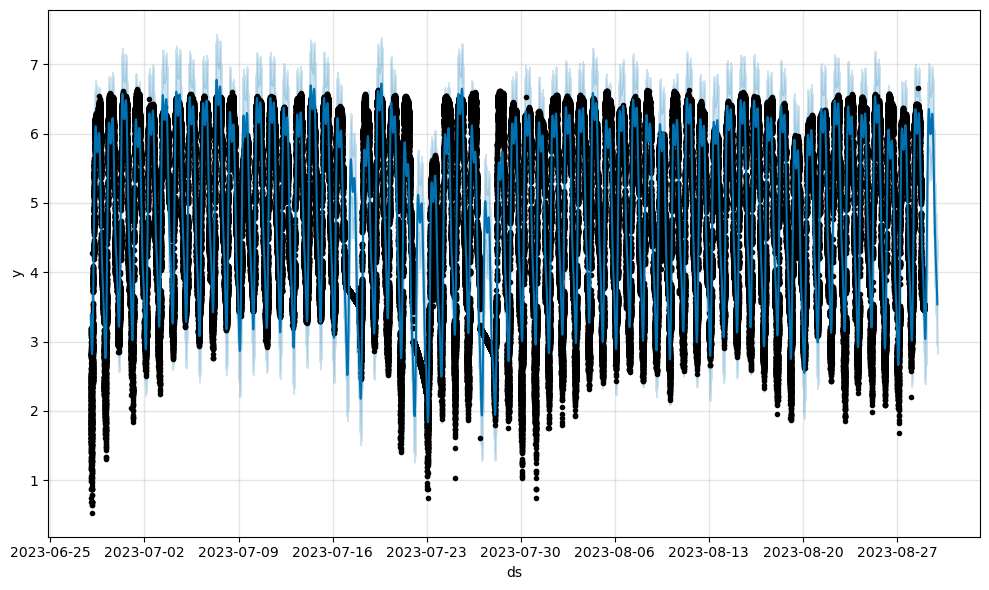

In [14]:
# 可视化结果
import matplotlib.pyplot as plt

fig = model.plot(forecast)
plt.show()

In [15]:
time_index = pd.date_range(start='2023-6-28 0:00:00',end='2023-08-29 23:59:45', freq='15S')
pred = pd.DataFrame(np.exp(np.array(forecast['yhat']))-1, index = time_index,columns=['FH'])
pred

,FH
2023-06-28 00:00:00,28.562957
2023-06-28 00:00:15,28.523157
2023-06-28 00:00:30,28.483387
2023-06-28 00:00:45,28.443647
2023-06-28 00:01:00,28.403937
...,...
2023-08-29 23:58:45,33.624953
2023-08-29 23:59:00,33.576756
2023-08-29 23:59:15,33.528596
2023-08-29 23:59:30,33.480475


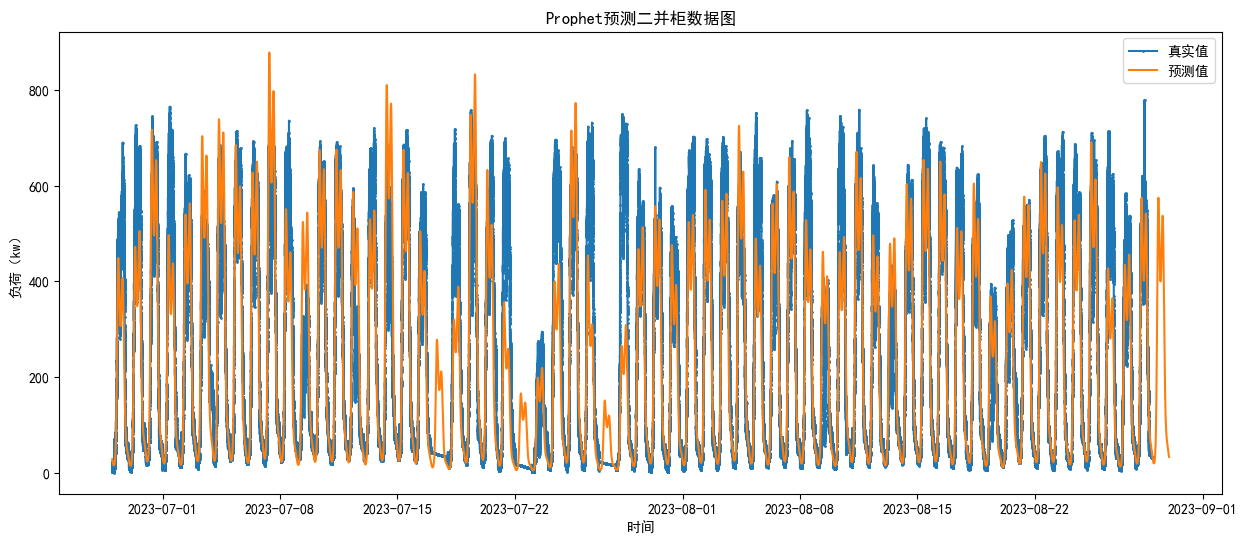

In [26]:
plt.figure(figsize=(15,6))
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.plot(df.index,df['FH'], marker='o', markersize=1)
plt.plot(pred.index, pred['FH'])
plt.legend(['真实值','预测值'])
plt.ylabel('负荷（kw）')
plt.xlabel('时间')
plt.title('Prophet预测二并柜数据图')
plt.savefig('Prophet预测二并柜负荷图.png',dpi=500)
plt.show()

In [17]:
pred1 = pred[pred.index>='2023-08-29 00:00:00']
pred1

,FH
2023-08-29 00:00:00,35.712529
2023-08-29 00:00:15,35.662996
2023-08-29 00:00:30,35.613501
2023-08-29 00:00:45,35.564044
2023-08-29 00:01:00,35.514626
...,...
2023-08-29 23:58:45,33.624953
2023-08-29 23:59:00,33.576756
2023-08-29 23:59:15,33.528596
2023-08-29 23:59:30,33.480475


In [27]:
pred1.to_csv('Prophet二并柜2023-08-29预测数据.csv')

# LSTM

In [6]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
time_step = 60
pred_esteps = 5760

# 将数据转换为 NumPy 数组
data_values = df1.values.reshape(-1, 1)

# 数据标准化
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_values)

# 创建数据集用于训练 LSTM
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


X, y = create_dataset(data_scaled, time_step)

# Reshape X to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
y = y.reshape(-1,1)

In [7]:
# 创建 LSTM 模型
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(pred_esteps))  # 预测未来多步
# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X, y, epochs=5, batch_size=32, verbose=2)

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
16199/16199 - 397s - 25ms/step - loss: 0.0011
Epoch 2/5
16199/16199 - 371s - 23ms/step - loss: 2.2447e-04
Epoch 3/5
16199/16199 - 360s - 22ms/step - loss: 2.1714e-04
Epoch 4/5
16199/16199 - 365s - 23ms/step - loss: 2.1312e-04
Epoch 5/5
16199/16199 - 359s - 22ms/step - loss: 2.1173e-04


In [8]:
# 使用模型进行预测
test_data = data_scaled[-time_step:]
test_data = test_data.reshape((1, time_step, 1))
predicted = model.predict(test_data)
# 反归一化预测结果
predicted = scaler.inverse_transform(predicted.reshape(-1, 1))

predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


array([[5.9672837],
       [5.965681 ],
       [5.964761 ],
       ...,
       [5.965095 ],
       [5.9667597],
       [5.9659915]], dtype=float32)

In [9]:
time_index = pd.date_range(start='2023-8-19 00:00:00',end='2023-08-19 23:59:45', freq='15S')
pred = pd.DataFrame(np.exp(predicted)-1, index = time_index,columns=['FH'])
pred

,FH
2023-08-19 00:00:00,389.443665
2023-08-19 00:00:15,388.818420
2023-08-19 00:00:30,388.459808
2023-08-19 00:00:45,389.416290
2023-08-19 00:01:00,389.519653
...,...
2023-08-19 23:58:45,388.403198
2023-08-19 23:59:00,388.689636
2023-08-19 23:59:15,388.590057
2023-08-19 23:59:30,389.239105


In [23]:
pred.to_csv('二并柜预测数据.csv')

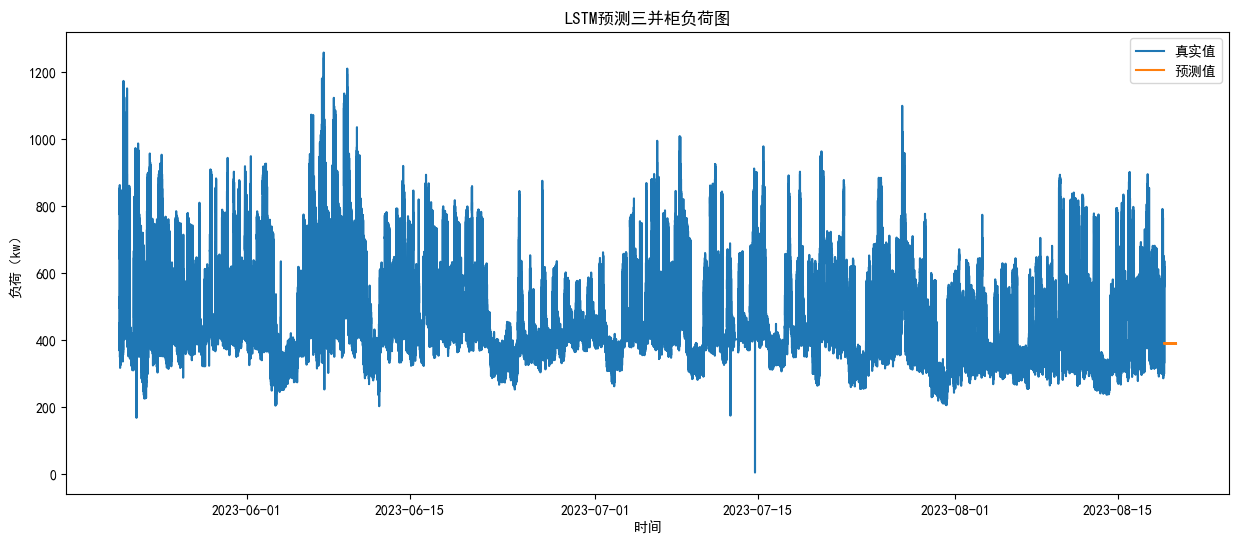

In [16]:
# 可视化
plt.figure(figsize=(15, 6))
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.plot(df.index, df['FH'])
plt.plot(pred.index, pred['FH'])
plt.legend(['真实值','预测值'])
plt.xlabel('时间')
plt.ylabel('负荷（kw）')
plt.title('LSTM预测三并柜负荷图')
plt.savefig('LSTM预测三并柜负荷图.png',dpi=500)
plt.show()

In [22]:
pred

,FH
2023-08-28 23:54:00,34.404587
2023-08-28 23:54:15,34.407867
2023-08-28 23:54:30,34.463100
2023-08-28 23:54:45,34.427048
2023-08-28 23:55:00,34.601860
...,...
2023-08-29 23:52:45,34.399578
2023-08-29 23:53:00,34.565098
2023-08-29 23:53:15,34.410652
2023-08-29 23:53:30,34.418571


# ARCH和GARCH

In [18]:
from arch import arch_model

In [19]:
# ARCH 模型
arch_model_fit = arch_model(df1['FH'], vol='ARCH', p=1).fit()

print("ARCH Model Summary:")
print(arch_model_fit.summary())

D:\Anaconda\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.08216. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      5,   Neg. LLF: 2.1022687091650132e+24
Iteration:      2,   Func. Count:     19,   Neg. LLF: 313477949416.4309
Iteration:      3,   Func. Count:     32,   Neg. LLF: 1342091.5626404001
Iteration:      4,   Func. Count:     38,   Neg. LLF: 370095576.4984828
Iteration:      5,   Func. Count:     51,   Neg. LLF: 5.024347713713077e+21
Iteration:      6,   Func. Count:     62,   Neg. LLF: 8809637.463468894
Iteration:      7,   Func. Count:     72,   Neg. LLF: 155926597.62859064
Iteration:      8,   Func. Count:     83,   Neg. LLF: 8.636708466405557e+16
Iteration:      9,   Func. Count:     93,   Neg. LLF: 48043541.53546929
Iteration:     10,   Func. Count:    103,   Neg. LLF: -8938.124366014727
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8938.124892054408
            Iterations: 14
            Function evaluations: 103
            Gradient evaluations: 10
ARCH Model Summary:
                      Constant Me

In [20]:
# GARCH 模型
garch_model_fit = arch_model(df1['FH'], vol='Garch', p=1, q=1).fit()

print("\nGARCH Model Summary:")
print(garch_model_fit.summary())

D:\Anaconda\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.08216. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 2355342776284.9346
Iteration:      2,   Func. Count:     21,   Neg. LLF: 46667397737.33707
Iteration:      3,   Func. Count:     33,   Neg. LLF: 5077809.71982101
Iteration:      4,   Func. Count:     39,   Neg. LLF: 1.2932394534762986e+24
Iteration:      5,   Func. Count:     54,   Neg. LLF: 3.160723128566171e+17
Iteration:      6,   Func. Count:     61,   Neg. LLF: 3160775.7593015092
Iteration:      7,   Func. Count:     68,   Neg. LLF: 1716686.902561346
Iteration:      8,   Func. Count:     75,   Neg. LLF: 431848041227.5634
Iteration:      9,   Func. Count:     90,   Neg. LLF: 7.871263160399165e+16
Iteration:     10,   Func. Count:     98,   Neg. LLF: 625576836770.652
Iteration:     11,   Func. Count:    113,   Neg. LLF: 1374289531864.7913
Iteration:     12,   Func. Count:    127,   Neg. LLF: 1634859.091065452
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 1634859.0882239172
   

D:\Anaconda\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



GARCH Model Summary:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                     FH   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:           -1.63486e+06
Distribution:                  Normal   AIC:                       3.26973e+06
Method:            Maximum Likelihood   BIC:                       3.26977e+06
                                        No. Observations:               518400
Date:                Sat, Aug 17 2024   Df Residuals:                   518399
Time:                        13:06:59   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.5571  1.248e-02     44.632     

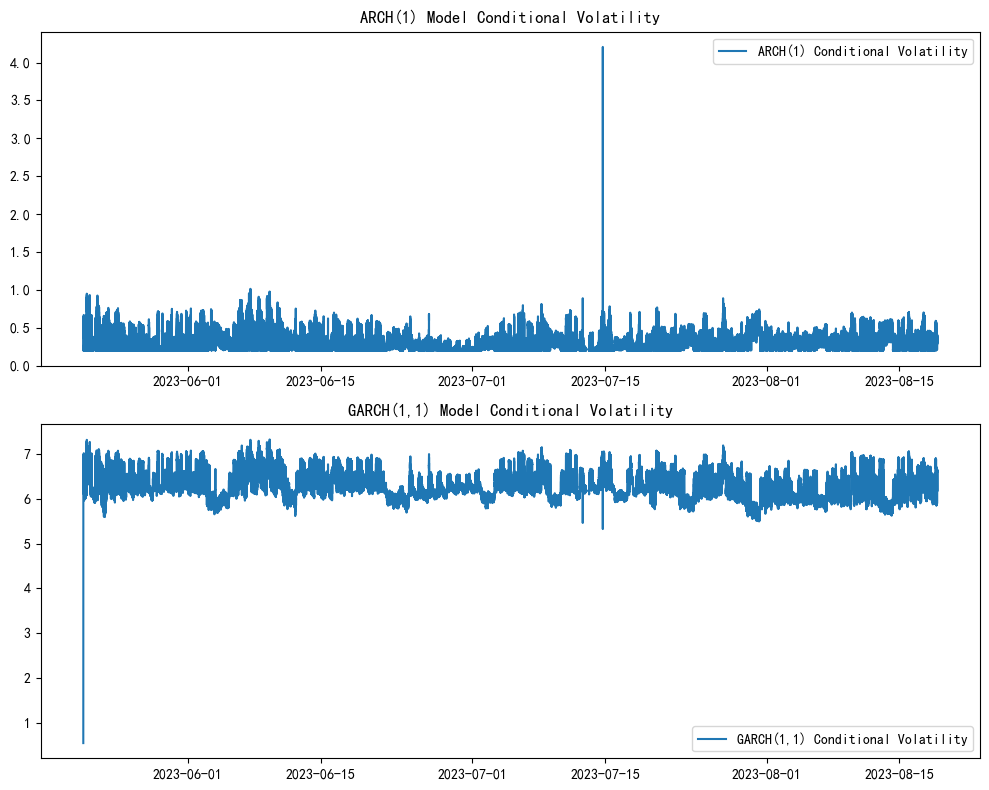

In [21]:
# 绘制拟合结果
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# ARCH 模型拟合结果
ax[0].plot(arch_model_fit.conditional_volatility, label='ARCH(1) Conditional Volatility')
ax[0].set_title('ARCH(1) Model Conditional Volatility')
ax[0].legend()

# GARCH 模型拟合结果
ax[1].plot(garch_model_fit.conditional_volatility, label='GARCH(1,1) Conditional Volatility')
ax[1].set_title('GARCH(1,1) Model Conditional Volatility')
ax[1].legend()

plt.tight_layout()
plt.show()

In [30]:
# 预测未来条件波动性
forecast = garch_model_fit.forecast(horizon=5760)  # horizon 是预测的期数
print(forecast)

In [26]:
time_index = pd.date_range(start='2023-8-19 0:00:00',end='2023-08-19 23:59:45', freq='15S')
pred = pd.DataFrame(np.exp(predicted_volatility)-1, index = time_index,columns=['FH'])
pred

C:\Users\25492\AppData\Local\Temp\ipykernel_10032\3539818617.py:2: RuntimeWarning: overflow encountered in exp
  pred = pd.DataFrame(np.exp(predicted_volatility)-1, index = time_index,columns=['FH'])


,FH
2023-08-19 00:00:00,9.059995e+17
2023-08-19 00:00:15,3.350172e+19
2023-08-19 00:00:30,1.659143e+21
2023-08-19 00:00:45,1.126794e+23
2023-08-19 00:01:00,1.076583e+25
...,...
2023-08-19 23:58:45,inf
2023-08-19 23:59:00,inf
2023-08-19 23:59:15,inf
2023-08-19 23:59:30,inf


# SARIMA

In [123]:
# 将数据化为平稳数据
# 60步差分
diff_60 = df.diff(5760)  # 非平稳序列经过d阶常差分和D阶季节差分变为平稳时间序列
diff_60 = diff_60.dropna()
diff_60

,FH
2023-05-22 00:00:00,1.4
2023-05-22 00:00:15,3.5
2023-05-22 00:00:30,23.5
2023-05-22 00:00:45,16.9
2023-05-22 00:01:00,6.4
...,...
2023-08-18 23:58:45,188.1
2023-08-18 23:59:00,212.5
2023-08-18 23:59:15,187.2
2023-08-18 23:59:30,230.4


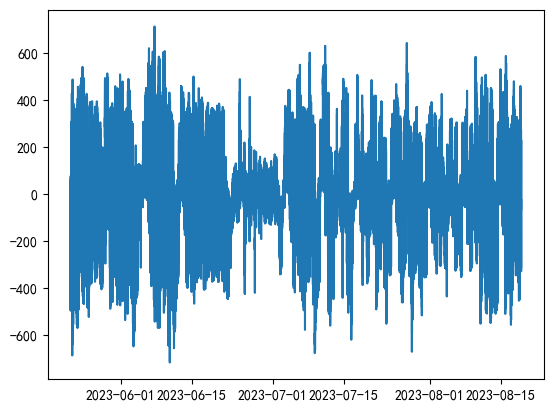

In [124]:
plt.plot(diff_60)

C:\Users\25492\AppData\Local\Temp\ipykernel_10032\3995785249.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  pacf.show()
C:\Users\25492\AppData\Local\Temp\ipykernel_10032\3995785249.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  acf.show()


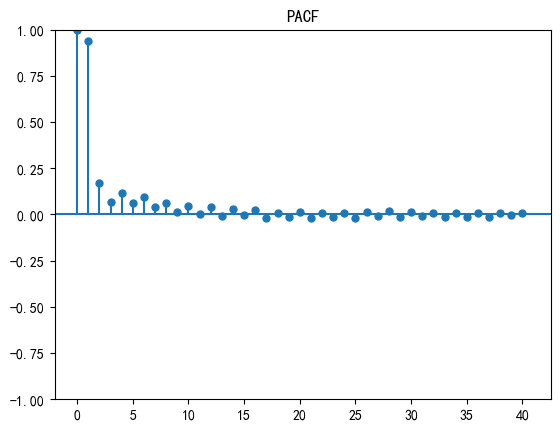

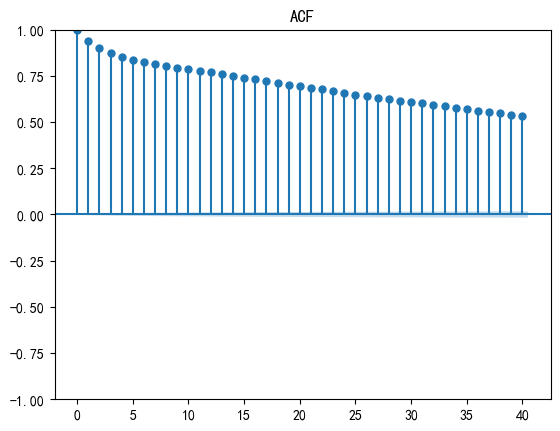

In [125]:
"""ACF,PACF图"""
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf = plot_pacf(diff_60, lags=40)
plt.title('PACF')
pacf.show()
acf = plot_acf(diff_60, lags=40)
plt.title('ACF')
acf.show()

In [126]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

# 拟合SARIMA模型
model = ARIMA(diff_60, order=(2, 1, 0))
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                     FH   No. Observations:               512640
Model:                 ARIMA(2, 1, 0)   Log Likelihood            -2815698.016
Date:                Sat, 17 Aug 2024   AIC                        5631402.033
Time:                        14:33:06   BIC                        5631435.475
Sample:                    05-22-2023   HQIC                       5631411.490
                         - 08-18-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2131      0.001   -258.537      0.000      -0.215      -0.212
ar.L2         -0.0866      0.001   -101.739      0.000      -0.088      -0.085
sigma2      3453.8227      2.298   1502.833      0.0

In [131]:
pred = fitted_model.forecast(steps=5760)
pred

2023-08-19 00:00:00   -4.128997
2023-08-19 00:00:15    8.742729
2023-08-19 00:00:30    0.910181
2023-08-19 00:00:45    1.464951
2023-08-19 00:01:00    2.024955
                         ...   
2023-08-19 23:58:45    1.858853
2023-08-19 23:59:00    1.858853
2023-08-19 23:59:15    1.858853
2023-08-19 23:59:30    1.858853
2023-08-19 23:59:45    1.858853
Freq: 15S, Name: predicted_mean, Length: 5760, dtype: float64

In [132]:
pred = pred+np.array(df.iloc[-5760:,0])
pred

2023-08-19 00:00:00    371.571003
2023-08-19 00:00:15    394.342729
2023-08-19 00:00:30    359.210181
2023-08-19 00:00:45    376.164951
2023-08-19 00:01:00    362.124955
                          ...    
2023-08-19 23:58:45    586.958853
2023-08-19 23:59:00    590.258853
2023-08-19 23:59:15    580.458853
2023-08-19 23:59:30    605.258853
2023-08-19 23:59:45    334.958853
Freq: 15S, Name: predicted_mean, Length: 5760, dtype: float64

In [139]:
pred.to_csv('三并柜预测数据.csv')

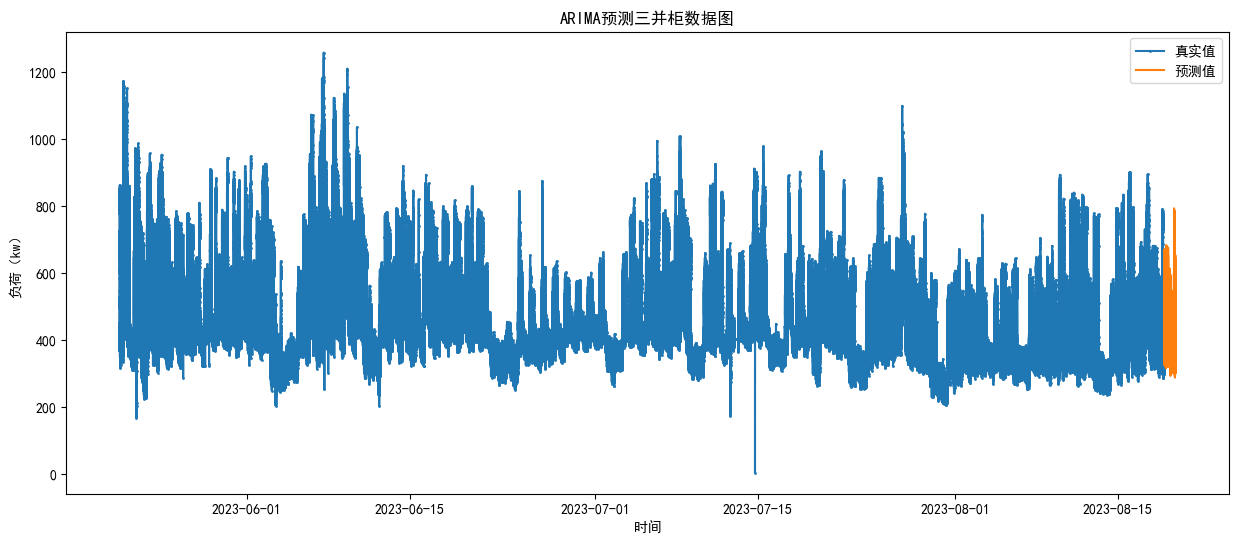

In [138]:
plt.figure(figsize=(15,6))
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.plot(df.index,df['FH'], marker='o', markersize=1)
plt.plot(pred.index, pred)
plt.legend(['真实值','预测值'])
plt.ylabel('负荷（kw）')
plt.xlabel('时间')
plt.title('ARIMA预测三并柜数据图')
plt.savefig('ARIMA预测三并柜负荷图.png',dpi=500)
plt.show()

# 评估

In [12]:
true_value = pd.read_excel('预测结果_三并柜_2023-08-19.xlsx',index_col=0)
true_value.index = pd.date_range(start='2023-08-19 00:00:00', end='2023-08-19 23:59:45', freq='15s')
true_value

,FH,FH_预测,CN_问题2,CN_问题3
2023-08-19 00:00:00,321.3,NaN,308.1,308.1
2023-08-19 00:00:15,317.4,NaN,308.1,308.1
2023-08-19 00:00:30,579.5,NaN,308.1,308.1
2023-08-19 00:00:45,590.5,NaN,308.1,308.1
2023-08-19 00:01:00,611.3,NaN,308.1,308.1
...,...,...,...,...
2023-08-19 23:58:45,387.4,NaN,0.0,0.0
2023-08-19 23:59:00,389.0,NaN,-308.1,-308.1
2023-08-19 23:59:15,388.0,NaN,-308.1,-308.1
2023-08-19 23:59:30,415.9,NaN,-308.1,-308.1


In [134]:
y_pred = pred
y_true = true_value['FH']
y_pred

2023-08-19 00:00:00    371.571003
2023-08-19 00:00:15    394.342729
2023-08-19 00:00:30    359.210181
2023-08-19 00:00:45    376.164951
2023-08-19 00:01:00    362.124955
                          ...    
2023-08-19 23:58:45    586.958853
2023-08-19 23:59:00    590.258853
2023-08-19 23:59:15    580.458853
2023-08-19 23:59:30    605.258853
2023-08-19 23:59:45    334.958853
Freq: 15S, Name: predicted_mean, Length: 5760, dtype: float64

In [141]:
# 计算 MSE
mse = np.mean((y_true - y_pred) ** 2)
print(f"MSE (均方误差): {mse}")

# 计算 MAE
mae = np.mean(np.abs(y_true - y_pred))
print(f"MAE (平均绝对误差): {mae}")

# 计算 MAPE
# 注意：在计算 MAPE 时要确保真实值中不包含零以避免除以零的错误
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"MAPE (平均绝对百分比误差): {mape}%")

from sklearn.metrics import r2_score

# 计算总平方和 (Total Sum of Squares, TSS)
y_mean = np.mean(y_true)
tss = np.sum((y_true - y_mean) ** 2)
# 计算残差平方和 (Residual Sum of Squares, RSS)
rss = np.sum((y_true - y_pred) ** 2)
# 计算 R 方值
r2 = 1 - (rss / tss)
print(f"R²（决定系数）：{r2}")

MSE (均方误差): 16682.725476510393
MAE (平均绝对误差): 82.6515369524786
MAPE (平均绝对百分比误差): 20.04988851982132%
R²（决定系数）：-0.47776985499700486


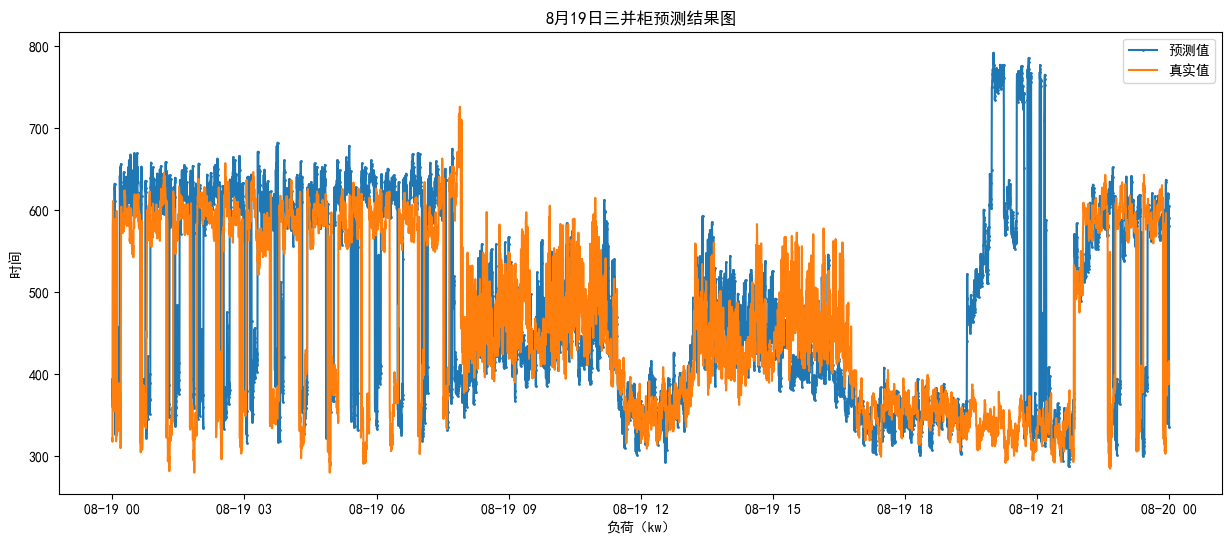

In [137]:
plt.figure(figsize=(15,6))
plt.plot(y_pred.index,y_pred, marker='o', markersize=1)
plt.plot(y_true.index,y_true )
plt.legend(['预测值','真实值'])
plt.xlabel('负荷（kw）')
plt.ylabel('时间')
plt.title('8月19日三并柜预测结果图')
plt.savefig('8月19日三并柜预测结果图.png', dpi=500)
plt.show()